## ASSOCIATION RULES

In [1]:
# Importing all the required packages

import mlxtend
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [2]:
# Uploading the required file

online_retail = pd.read_excel("Online retail.xlsx",header=None)
online_retail

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [3]:
# Split the column values by commas and expand it into separate columns

online_retail = online_retail[0].str.split(',', expand=True)
online_retail.head()

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,chutney,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,turkey,avocado,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,mineral water,milk,energy bar,whole wheat rice,green tea,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


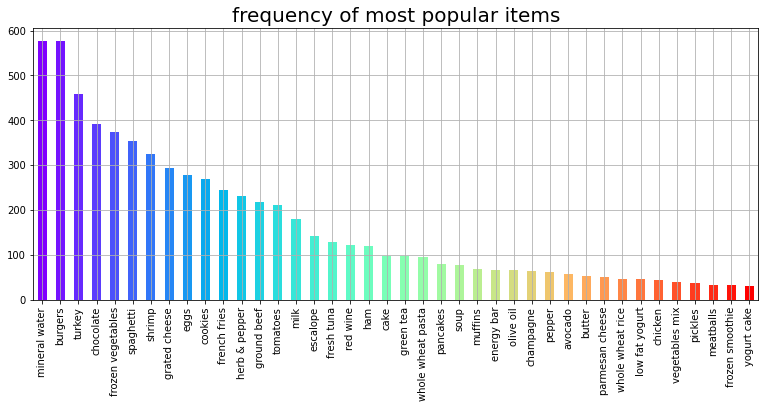

In [4]:
# Finding the frequency of the items purchased online

color = plt.cm.rainbow(np.linspace(0, 1, 40))
online_retail[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [5]:
# Getting the list of all purchased items from the dataset

transactions = []
for i in range(0, len(online_retail)):
    transactions.append([str(online_retail.values[i,j]) for j in range(0, len(online_retail.columns))])

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
transactions[:1]

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil']]

In [7]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('None', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [8]:
onehot["almonds"].value_counts()

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False    7348
True      153
Name: almonds, dtype: int64

In [9]:
onehot["shrimp"].value_counts()

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False    6965
True      536
Name: shrimp, dtype: int64

In [10]:
# Apply Apriori algorith to get itemset combinations

frequent_itemsets = apriori(onehot, min_support = 0.005,use_colnames=True)
frequent_itemsets

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.008932,(antioxydant juice)
2,0.033329,(avocado)
3,0.008666,(bacon)
4,0.010799,(barbecue sauce)
...,...,...
720,0.007466,"(mineral water, spaghetti, soup)"
721,0.009332,"(mineral water, tomatoes, spaghetti)"
722,0.006399,"(mineral water, turkey, spaghetti)"
723,0.006266,"(whole wheat rice, mineral water, spaghetti)"


In [11]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   725 non-null    float64
 1   itemsets  725 non-null    object 
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Appplying the association rules algorithm

online_retail = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
online_retail

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(almonds),0.087188,0.020397,0.005199,0.059633,2.923577,0.003421,1.041724,0.720799
1,(almonds),(burgers),0.020397,0.087188,0.005199,0.254902,2.923577,0.003421,1.225089,0.671653
2,(almonds),(chocolate),0.020397,0.163845,0.005999,0.294118,1.795099,0.002657,1.184553,0.452150
3,(chocolate),(almonds),0.163845,0.020397,0.005999,0.036615,1.795099,0.002657,1.016834,0.529719
4,(almonds),(eggs),0.020397,0.179709,0.006532,0.320261,1.782108,0.002867,1.206774,0.448005
...,...,...,...,...,...,...,...,...,...,...
1827,"(pancakes, spaghetti)",(olive oil),0.025197,0.065858,0.005066,0.201058,3.052910,0.003407,1.169224,0.689825
1828,"(olive oil, spaghetti)",(pancakes),0.022930,0.095054,0.005066,0.220930,2.324260,0.002886,1.161572,0.583127
1829,(pancakes),"(olive oil, spaghetti)",0.095054,0.022930,0.005066,0.053296,2.324260,0.002886,1.032075,0.629602
1830,(olive oil),"(pancakes, spaghetti)",0.065858,0.025197,0.005066,0.076923,3.052910,0.003407,1.056037,0.719852


C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


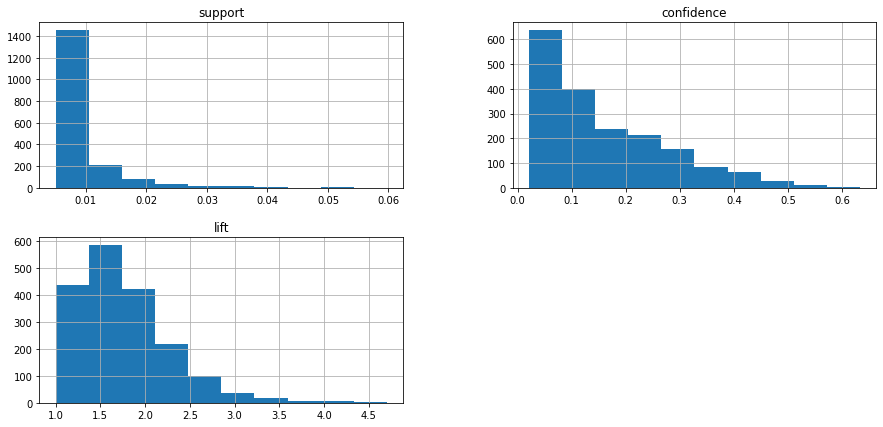

In [13]:
# Plotting the grapgh of support, confidence and lift

online_retail[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


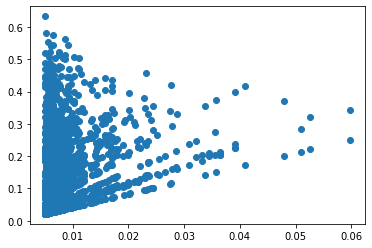

In [14]:
# Plotting the scattering plot between support and confidence

plt.scatter(online_retail['support'], online_retail['confidence'])
plt.show()

In [15]:
# Picking the top 10 lift values combination

online_retail.nlargest(10, ['lift'])

C:\Users\malla\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
376,(pasta),(escalope),0.015731,0.079323,0.005866,0.372881,4.700812,0.004618,1.468107,0.799853
377,(escalope),(pasta),0.079323,0.015731,0.005866,0.073950,4.700812,0.004618,1.062867,0.855100
770,(pasta),(shrimp),0.015731,0.071457,0.005066,0.322034,4.506672,0.003942,1.369601,0.790543
771,(shrimp),(pasta),0.071457,0.015731,0.005066,0.070896,4.506672,0.003942,1.059374,0.837987
754,(whole wheat pasta),(olive oil),0.029463,0.065858,0.007999,0.271493,4.122410,0.006059,1.282270,0.780417
755,(olive oil),(whole wheat pasta),0.065858,0.029463,0.007999,0.121457,4.122410,0.006059,1.104713,0.810823
1623,"(herb & pepper, spaghetti)",(ground beef),0.016264,0.098254,0.006399,0.393443,4.004360,0.004801,1.486663,0.762677
1626,(ground beef),"(herb & pepper, spaghetti)",0.098254,0.016264,0.006399,0.065129,4.004360,0.004801,1.052269,0.832021
1621,(ground beef),"(herb & pepper, mineral water)",0.098254,0.017064,0.006666,0.067843,3.975683,0.004989,1.054474,0.830024
1616,"(herb & pepper, mineral water)",(ground beef),0.017064,0.098254,0.006666,0.390625,3.975683,0.004989,1.479789,0.761465


**In order to look for a better association between antecedents and consequents, Support(Consequent) should be less and Confidence(antecedents -> consequents) should be more giving the highest value of Lift**


In above table we pick top 10 value with highest lift.

            (pasta) ----> (escalope)	
            (pasta)	-----> (shrimp)	
            (whole wheat pasta)	-----> (olive oil)
            (spaghetti, herb & pepper)	-----> (ground beef)	
            (ground beef) ----->	(mineral water, herb & pepper)	
            
***By apppling some kind of offers between above combinations the online_retail can boost their sales.***